In [112]:
import pandas as pd
import glob
import os

accounts_df = []
spending_df = pd.DataFrame()
directory_path = "/Users/kingwanlau/Downloads"
csv_files = glob.glob(os.path.join(directory_path, "Chase*.CSV"))
for i, csv_file in enumerate(csv_files):
    if i == 0:
        spending_df = pd.read_csv(csv_file)
    else:
        spending_df = pd.concat([spending_df,pd.read_csv(csv_file)], ignore_index=True)


# Remove rows for Auto Payment
spending_df = spending_df[spending_df["Type"] != "Payment"]

# drop columns
spending_df = spending_df.drop(columns=["Post Date", "Memo", "Type", "Card"])

# convert to datetime type
spending_df["Transaction Date"] = pd.to_datetime(spending_df["Transaction Date"], format="%m/%d/%Y")

# Convert Amount into Positive for better charting
spending_df["Amount"] = spending_df["Amount"]*-1.0

spending_df = spending_df.sort_values(by="Transaction Date", ascending=False)

spending_df.head()

,Transaction Date,Description,Category,Amount
0,2025-09-18,MCDONALD'S F748,Food & Drink,0.54
1,2025-09-18,MCDONALD'S F748,Food & Drink,0.54
2,2025-09-17,COSTCO WHSE #0326,Shopping,3.25
3,2025-09-14,TRADER JOE S #533,Groceries,51.02
4,2025-09-14,GULF OIL 92042729,Gas,20.01


In [113]:
import re

def assign_category(description):
    if re.search( r"(^EXXON|^SPEEDWAY|^MAIN\s+ST\s+GAS|^SUNOCO|GULF\s+OIL).*?", str(description), re.IGNORECASE):
        return "Gas"
    elif re.search( r"^Costco\s+Annual\s+Membership\s+Renewal", str(description), re.IGNORECASE):
        return "Fees and Adjustments"
    elif re.search( r"^COSTCO\s+WHSE.*?", str(description), re.IGNORECASE):
        return "Costco"
    else:
        return "Shopping"


citibank_spending_df = pd.DataFrame()
directory_path = "/Users/kingwanlau/Downloads"
citibank_spending_csvs = glob.glob(os.path.join(directory_path, "Citi*.CSV"))

for citibank_spending_csv in citibank_spending_csvs:
    if citibank_spending_df.empty:
        citibank_spending_df = pd.read_csv(citibank_spending_csv)
    else:
        citibank_spending_df = pd.concat([citibank_spending_df,pd.read_csv(citibank_spending_csv)], ignore_index=True)

# assign Credit to Debit if it is not in NaN
citibank_spending_df.loc[citibank_spending_df["Credit"].notna(),"Debit"] =citibank_spending_df["Credit"] #*-1.0

# drop columns
citibank_spending_df = citibank_spending_df.drop(columns=["Status", "Member Name", "Credit"])

# delete rows for Auto Payment
citibank_spending_df = citibank_spending_df[~citibank_spending_df["Description"].str.contains(r"^AUTOPAY\s+.*?\s+AUTO-PMT$", na=False, regex=True)]

# rename column
citibank_spending_df = citibank_spending_df.rename(columns={"Date": "Transaction Date", "Debit": "Amount"})

# convert to datetime type
citibank_spending_df["Transaction Date"] = pd.to_datetime(citibank_spending_df["Transaction Date"], format="%m/%d/%Y")

# insert a column 
citibank_spending_df.insert(2, "Category", "Shopping")

# assign Category base on Description
citibank_spending_df["Category"] = citibank_spending_df["Description"].apply(assign_category)

citibank_spending_df.head(30)


,Transaction Date,Description,Category,Amount
0,2024-12-31,COSTCO WHSE #0326 PORT CHESTER NY,Costco,27.66
1,2024-12-29,COSTCO WHSE #0326 PORT CHESTER NY,Costco,10.49
2,2024-12-22,COSTCO WHSE #0326 PORT CHESTER NY,Costco,0.75
3,2024-12-22,COSTCO WHSE #0326 PORT CHESTER NY,Costco,12.98
4,2024-12-20,EXXON NYST #447 HANNACROIX NY,Gas,34.91
6,2024-12-01,SPEEDWAY 07891 TROY NY,Gas,28.95
7,2024-11-29,COSTCO WHSE #0324 NORWALK CT,Costco,4.99
8,2024-11-29,COSTCO WHSE #0324 NORWALK CT,Costco,6.42
9,2024-11-26,SUNOCO 8002068201 TROY NY,Gas,22.61
10,2024-11-15,MAIN ST GAS PORTCHESTER NY,Gas,34.41


In [114]:
spending_df = pd.concat([spending_df,citibank_spending_df], ignore_index=True)
spending_df.to_csv(f"{directory_path}/combined2.csv", index=False)


<Figure size 1400x700 with 0 Axes>

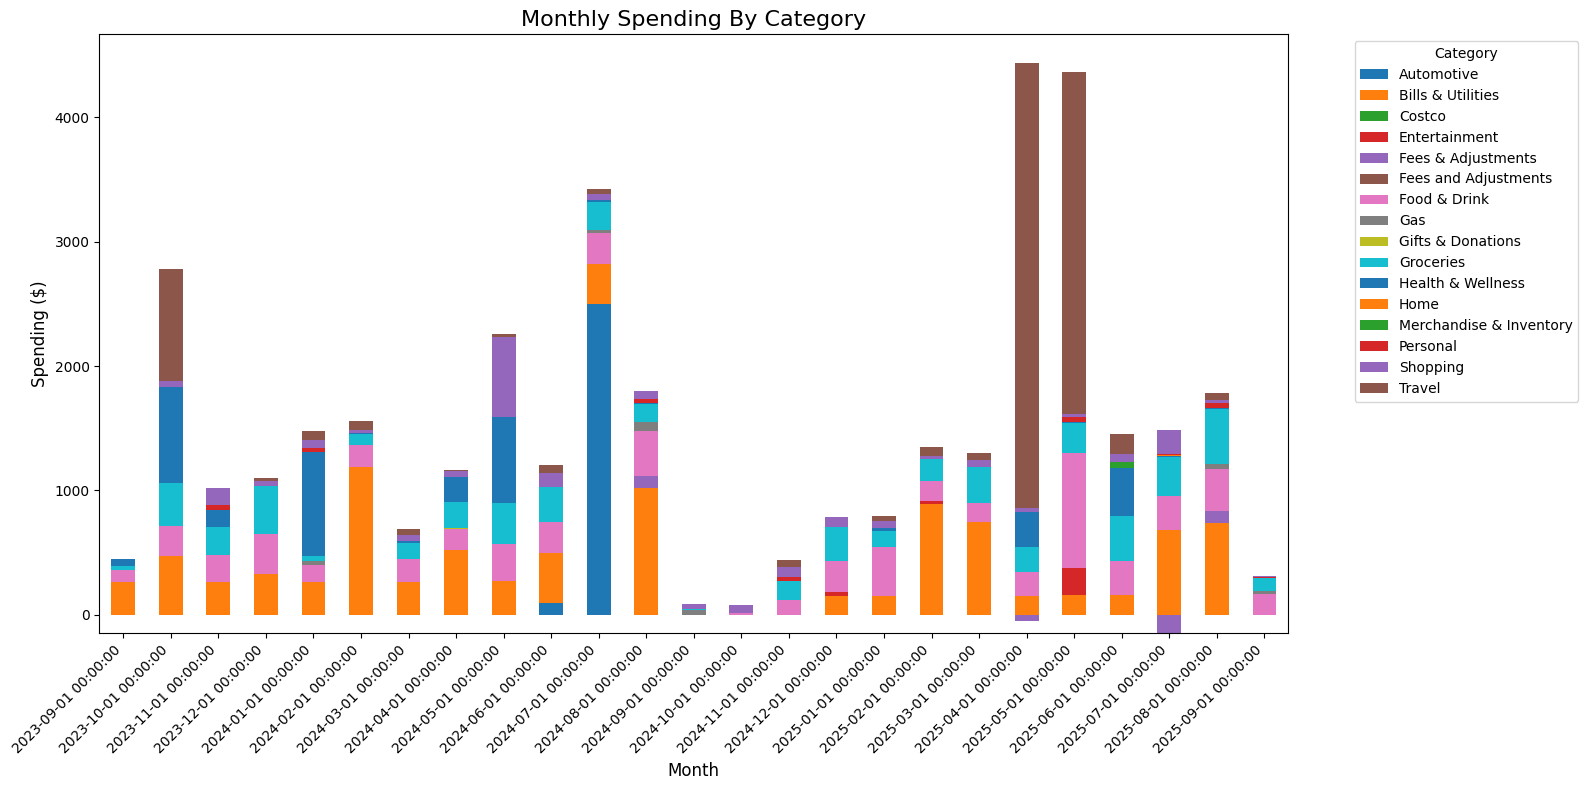

In [106]:
import matplotlib.pyplot as plt

monthly_category_spending = (
    spending_df.groupby([spending_df['Transaction Date'].dt.to_period('M'), 'Category'])['Amount']
    .sum()
    .unstack(fill_value=0)
    .sort_index()
)

monthly_category_spending.index = monthly_category_spending.index.to_timestamp()

plt.figure(figsize=(14,7))
monthly_category_spending.plot(kind='bar', stacked=True, figsize=(16,8))

plt.title('Monthly Spending By Category', fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Spending ($)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()



In [91]:
spending_df[spending_df["Category"] == "Fees & Adjustments"]

,Transaction Date,Description,Category,Type,Amount
23,2025-08-31,Offer:McDonald's,Fees & Adjustments,Adjustment,-0.29
64,2025-08-01,ANNUAL MEMBERSHIP FEE,Fees & Adjustments,Fee,95.00
710,2025-07-24,Offer:AT&amp;T Wireless,Fees & Adjustments,Adjustment,-75.00
73,2025-07-19,Offer:AT&amp;T Wireless,Fees & Adjustments,Adjustment,-75.00
194,2025-04-13,ANNUAL HOTEL CREDIT,Fees & Adjustments,Adjustment,-50.00
343,2024-08-01,ANNUAL MEMBERSHIP FEE,Fees & Adjustments,Fee,95.00
